In [1]:
import pandas as pd
import numpy as np
import requests
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as PLT
from prophet import Prophet

In [32]:
start = dt.datetime(2018,1,1)
# end = dt.datetime.now()
end = dt.datetime(2022,11,22)
BNB = web.DataReader('DOGE-USD', 'yahoo', start, end)
BNB = BNB.reset_index()
BNB['Date'] = pd.to_datetime(BNB['Date'])
BNB = BNB.rename(columns={'Date':'date','Adj Close':'price'})

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/DOGE-USD/history?period1=1514779200&period2=1669175999&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f958f404880>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [ ]:
GRPS = BNB.resample(rule='2W', on='date')['price'].mean()
DFW = pd.concat([pd.Series(GRPS.keys()),pd.Series(GRPS.values,name='price')],axis=1)
DFW = DFW.rename(columns={'date':'ds','price':'y'})

In [ ]:
p = Prophet(changepoint_prior_scale=100)
p.fit(DFW)
future = p.make_future_dataframe(periods=5,freq='MS')
predict = p.predict(future)

In [ ]:
p.plot(predict,uncertainty=False,figsize=(15,5),xlabel='BTC/USDT')

In [6]:
BNB.set_index('date',inplace=True)

In [7]:
BNB.head()

,High,Low,Open,Close,Volume,price
date,,,,,,
2018-01-01,0.009063,0.008101,0.009031,0.008909,50616900,0.008909
2018-01-02,0.009598,0.008551,0.008873,0.009145,89424096,0.009145
2018-01-03,0.009584,0.008882,0.009088,0.009320,66349900,0.009320
2018-01-04,0.010036,0.008768,0.009346,0.009644,108986000,0.009644
2018-01-05,0.012283,0.009589,0.009660,0.012167,212383008,0.012167


In [44]:
BNB.resample(rule='Y').mean()

,High,Low,Open,Close,Volume,price
date,,,,,,
2018-12-31,0.004577,0.004125,0.004368,0.004350,2.172325e+07,0.004350
2019-12-31,0.002631,0.002499,0.002564,0.002563,4.463969e+07,0.002563
2020-12-31,0.002822,0.002660,0.002736,0.002743,1.322822e+08,0.002743
2021-12-31,0.218370,0.190461,0.204220,0.204723,4.142664e+09,0.204723
2022-12-31,0.103515,0.096378,0.099811,0.099549,9.045880e+08,0.099549


In [52]:
BNB.resample(rule='Y').agg({
    'price' : lambda x : 0
})

,price
date,
2018-12-31,0.0
2019-12-31,0.0
2020-12-31,0.0
2021-12-31,0.0
2022-12-31,0.0


<AxesSubplot:xlabel='date'>

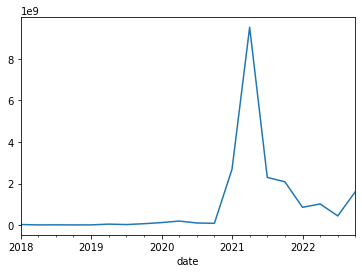

In [57]:
BNB.resample(rule='Q')['Volume'].mean().plot()

<AxesSubplot:xlabel='date'>

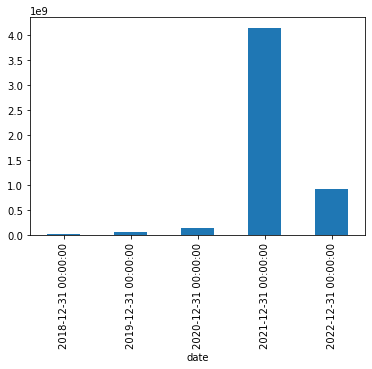

In [59]:
BNB.resample(rule='A')['Volume'].mean().plot(kind='bar')

<AxesSubplot:xlabel='date'>

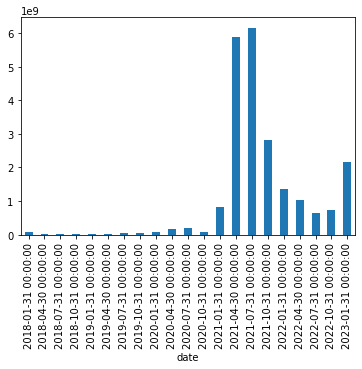

In [62]:
BNB.resample(rule='3M')['Volume'].mean().plot(kind='bar')